In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [75]:
dataset, info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [76]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [77]:
for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [78]:
type(dataset)

list

In [79]:
def split_dataset(dataset, train_r, val_r, test_r):
  size = len(dataset)
  train_dataset = dataset.take(int(train_r * size))

  val_t_dataset = dataset.skip(int(train_r * size))
  val_dataset = val_t_dataset.take(int(val_r * size))

  test_dataset = val_t_dataset.skip(int(val_r * size))

  return train_dataset, test_dataset, val_dataset

In [80]:
train, test, val = split_dataset(dataset[0], 0.8, 0.1, 0.1)

In [81]:
list(train.take(1))

[(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
  array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8)>,
  <tf.Tensor: shape=(), dtype=int64, numpy=1>

In [82]:
train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# **VISUALIZATION**

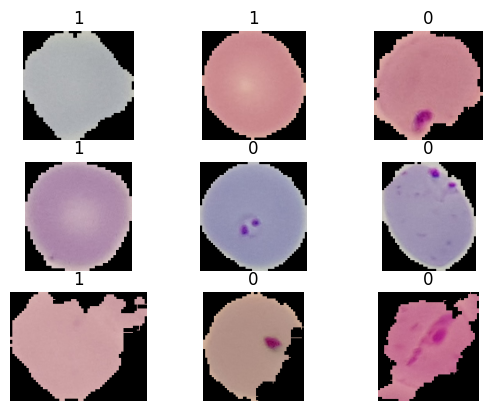

In [83]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(str(label.numpy()))
  plt.imshow(img);

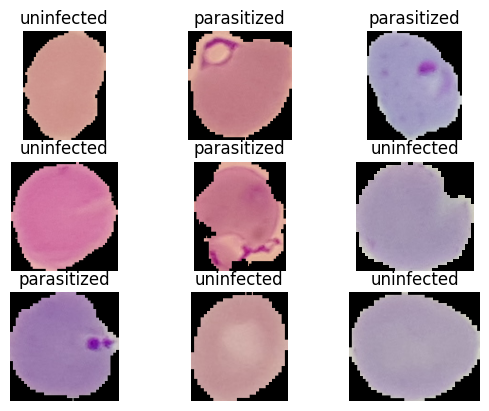

In [84]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(info.features['label'].int2str(label))
  plt.imshow(img);

In [51]:
# 0 - parasitized
# 1 - uninfected

# **PREPROCESSING**

In [85]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE)) / 255.0, label

In [86]:
train = train.map(resize_rescale)
val = val.map(resize_rescale)
test = test.map(resize_rescale)

In [87]:
for i, l in train.take(1):
  print(i, l)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [88]:
train = train.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val = val.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test = test.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(1).prefetch(tf.data.AUTOTUNE)

# **MODEL BUILDING**

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [18]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [19]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics='accuracy'
)

In [20]:
hist = model.fit(
    train,
    validation_data=val,
    epochs=20,
    verbose=1
)

Epoch 1/20
689/689 [==============================] - 61s 78ms/step - loss: 0.3475 - accuracy: 0.8418 - val_loss: 0.8502 - val_accuracy: 0.8403
Epoch 2/20
689/689 [==============================] - 52s 76ms/step - loss: 0.2036 - accuracy: 0.9315 - val_loss: 0.2429 - val_accuracy: 0.9151
Epoch 3/20
689/689 [==============================] - 45s 65ms/step - loss: 0.1895 - accuracy: 0.9377 - val_loss: 0.2780 - val_accuracy: 0.9103
Epoch 4/20
689/689 [==============================] - 53s 77ms/step - loss: 0.1824 - accuracy: 0.9405 - val_loss: 0.4556 - val_accuracy: 0.7793
Epoch 5/20
689/689 [==============================] - 50s 73ms/step - loss: 0.1789 - accuracy: 0.9418 - val_loss: 0.2886 - val_accuracy: 0.9296
Epoch 6/20
689/689 [==============================] - 57s 83ms/step - loss: 0.1561 - accuracy: 0.9481 - val_loss: 0.7300 - val_accuracy: 0.7234
Epoch 7/20
689/689 [==============================] - 47s 68ms/step - loss: 0.1917 - accuracy: 0.9360 - val_loss: 0.4954 - val_accuracy:

In [89]:
model.evaluate(test)

2757/2757 [==============================] - 23s 4ms/step - loss: 0.1829 - accuracy: 0.9456


[0.1829175055027008, 0.9455930590629578]

In [101]:
y_pred = model.predict(test)

2757/2757 [==============================] - 20s 3ms/step


In [102]:
y_pred

array([[1.8149352e-04],
       [8.2138145e-01],
       [1.8915061e-04],
       ...,
       [9.4081354e-01],
       [2.1362361e-05],
       [9.7982866e-01]], dtype=float32)

In [103]:
def parasite_or_not(img):
  if img < 0.5:
    return 'P😔'
  else:
    return 'U'

In [104]:
y_pred

array([[1.8149352e-04],
       [8.2138145e-01],
       [1.8915061e-04],
       ...,
       [9.4081354e-01],
       [2.1362361e-05],
       [9.7982866e-01]], dtype=float32)

In [105]:
result_labels = []

for i in y_pred:
  result_labels.append(parasite_or_not(i[0]))

In [106]:
result_labels[:5]

['P😔', 'U', 'P😔', 'P😔', 'U']

In [107]:
len(result_labels)

2757

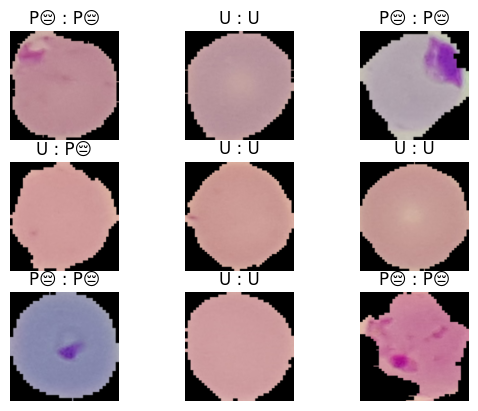

In [109]:
for i, (img, label) in enumerate(test.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(f'{parasite_or_not(label.numpy()[0])} : {str(result_labels[i])}')
  plt.imshow(img[0]);

<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>
<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>
<img src='https://media.tenor.com/u56nhKZD24AAAAAi/catkiss-cat.gif'>